# Feature Engineering
Feature engineering is an essential part of building an intelligent system. Feature Engineering is an art as well as a science, this is the reason a typical data scientist spends 70 – 80% of his time cleaning and preparing the data which can improve model quality. The performance of a machine learning model not only depends on the model and the hyperparameters but also on how we process and feed different types of variables to the model. Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

### Defining Feature engineering
Feature engineering is a process of using domain knowledge to create/extract new features from a given dataset by using data mining techniques. It helps machine learning algorithms to understand data and determine patterns that can improve the performance of machine learning algorithms.
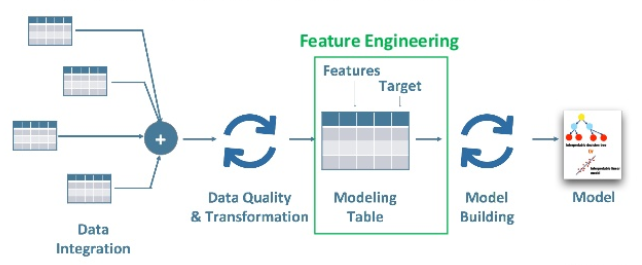

### What is categorical data?
Categorical variables are usually represented as ‘strings’ or ‘categories’ and are finite in number. The variables only have definite possible values. Further, we can see there are two kinds of categorical data-
1. Ordinal Data: The categories have an inherent order
2. Nominal Data: The categories do not have an inherent order

# One hot encoding

1. We use this categorical data encoding technique when the features are nominal(do not have any order).
2. In one hot encoding, for each level of a categorical feature, we create a new variable. 
3. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.
4. These newly created binary features are known as Dummy variables.
5. The number of dummy variables depends on the levels present in the categorical variable.  

One hot encoding is used when we have to classify our feature with a huge amount of categories. Though get_dummies could make task easier but it is only preferrable for feature with less than 10 categories.

In [1]:
import numpy as np
import pandas as pd

In [42]:
data = pd.read_csv('train.csv',usecols=['X1','X2','X3','X4','X5','X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [7]:
# HOW MANY UNIQUE CATEGORIES?
for col in data.columns:
    print(col,':',len(data[col].unique()),'columns')

X1 : 27 columns
X2 : 44 columns
X3 : 7 columns
X4 : 4 columns
X5 : 29 columns
X6 : 12 columns


In [8]:
pd.get_dummies(data,drop_first=True).shape
# Extra 111 columns that would impact on our accuracy level

(4209, 117)

In [14]:
# select first 10 most frequent categories
data['X2'].value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [21]:
# take top 10
# idea behind is rest other are ignored as noise
ind = list(data['X2'].value_counts().sort_values(ascending=False).head(10).index)
ind

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [23]:
# since we chose 10 distinct values thus we make 10 columns
for i in ind:
    data[i] = np.where(data['X2']==i,1,0)
data[['X2']+ind].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [24]:
def one_hot_top(data,variable,top_x_labels):
    for i in top_x_labels: # top x most occured categories
        data[variable+'_'+i] = np.where(data[variable]==i,1,0) #creating new column at each iteration
        # variable is feature for which we apply one hot encoding, i is unique category in feature

#### Functioning of one_hot_top
parameters-
1. ```data```: the dataset inside which we have to do one hot encoding
2. ```variable```: This is the categorical feature with the help of which one hot encoding is achieved
3. ```top_x_labels```: all the labels that are most frequently occuring are determined and are placed inside a list that is named as top_x_labels. for this problem we have x=10 that means we want to determine top 10 labels.  

output-  
addition of ```x``` new columns inside dataset that are named as 'variable_i' where variable is a parameter that is a categorical feature to the dataset and i represents looping variable of list top_x_labels.

In [50]:
# i read data again from above
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [32]:
features = list(data['X1'].value_counts().sort_values(ascending=False).head(10).index)
features #this is top x labels that is being expected as parameter in our self made function one_hot_top.

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [35]:
one_hot_top(data,'X1',features) 
data.head(20)

,X1,X2,X3,X4,X5,X6,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0
5,b,e,c,d,g,h,0,0,1,0,0,0,0,0,0,0
6,r,e,f,d,f,h,0,0,0,0,0,1,0,0,0,0
7,l,as,f,d,f,j,0,0,0,1,0,0,0,0,0,0
8,s,as,e,d,f,i,0,1,0,0,0,0,0,0,0,0
9,b,aq,c,d,f,a,0,0,1,0,0,0,0,0,0,0


### Advantages
1. Straightforward to implement
2. Reduces time wastage on variable exploration
3. no expand in massive feature quantity
4. removes noise(categories with less amount of occurence)

### Disadvantages
1. no addition of information to feature
2. no more info. of removed labels
3. ```Dummy variable trap```: It is a phenomenon where features are highly correlated. That means using the other variables, we can easily predict the value of a variable.

# Various kinds of feature engineering encoding techniques

2 types of encoding techniques
1. Nominal Encoding  
    a. One hot Encoding  
    b. One hot Encoding with many categories    
    c. Mean Encoding
2. Ordinal Encoding  
    a. Label Encoding  
    b. Target Guided Ordinal Encoding

## 1. Nominal encoding:
We do not have inherent order in this kind of encoding technique.  
We have to consider the presence or absence of a feature.  
No notion of order is present.
### One Hot Encoding
no. of new columns = no. of unique features (or no. of unique features-1 when we are using dummy variable trap)  
new columns are of type binary (0s and 1s)  
these newly created binary features are called dummy variables.  
drawbacks of one hot encoding:  
1. A large number of levels are present in data. If there are multiple categories in a feature variable in such a case we need a similar number of dummy variables to encode the data. For example, a column with 30 different values will require 30 new variables for coding.
2. Does not add much additional information
3. Due to the massive increase in the dataset, coding slows down the learning of the model along with deteriorating the overall performance that ultimately makes the model computationally expensive.

### One hot encoding with many categories 
It is very much similar to one hot encoding but this covers up the one of the drawback of prev. one.  
Here we choose most frequent values(like first 10 or 20 most frequent values) and eliminate other values.    
Advantages:  
1. removes noise(other values) that are not much informative(commonly)
2. can classify datasets with 100 or 1000 values  

Disadvantage:
1. there may contains important information in eliminated values
2. no much information added

### Mean Encoding
1. Here we just find the mean of occurence of category throughout the feature.  
2. and thus we classify data on basis of mean.  
3. We are converting our feature into mean values.  

Drawback

Our data may overfit

## Ordinal Encoding
### Label encoding
1. We are assigning values on basis of rank/preference of our choice
2. Each category is assigned with its own integer.

We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence. In Label encoding, each label is converted into an integer value. 

### Target guided ordinal Encoding
1. We consider both columns and we find mean of output values.
2. We assign rank on basis of higher mean.
4. Higher the value higher is the rank
3. We rearrange on basis of rank asigned to all variables.
 
In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category..

# Feature Scaling
Feature scaling is a technique to scale our features that would not result in any kind of difficulties in machine learning algoriths  
Most of the ML algorithms are based on KNN type that deals with eucledian/manhatan distance and gradient descent type where we need to scale our features so that there may not arrise error.  
Magnitudes in form of kg and g are finally inputted in a productive and scaled way with the use of feature scaling.  
We are standardizing indepent values within a limited range

Every feature is represented by  
1. Magnitude
2. Unit

## Scaling techniques
### standardisation:
here our each attribute of our feature is converted into the range of values between 0-1
formula : (x-mean)/standard deviation
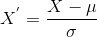

### mean normalisation:
here our feature is now converted such that our all values lies inside range -1 to +1 and our mean = 0.

### minmax scaling normalisation:
Here our data ranges from -1 to +1
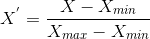

### Unit vector scaling
Here our data ranges in between 0 and 1 but its a different kind of technique

# Handling missing values in catagorical feature

It is necessary to usually handle missing values as it would be a bit problematic as we feed them in ml lodels as they would reduce accuracy.  
Some ways to handle with missing values:
1. Delete all rows containing null values: Usually not prefered  
    a. We may loose our crucial data  
    b. There may be low efficiency of our model.  
2. Replace with most frequent values.  
    a. There may arise a case when our training data may become unbalanced.
3. Applying Classifier algorithm to predict null values(Efficient way)  
    a. Our column for which we want to get rid of null values is regarded as output.  
    b. Rest other features are input to algo.  
    c. Now all missing values are included in test set and rest other are in train set to train our model
4. Unsupervised learning.  
    a. Here we may make use clustering as well as eucledian distance based algon that would help in getting missing values.

# Handle Categorical Features Many Categories(Count/Frequency Encoding)

2 types of categorical variables : 
1. Ordinal(rank matters)
2. Nominal(rank doesnt matters)  

## count/ frequency encoding

1. Applied when we have high no. of labels(high cardinality)
2. Replace(label -> count of label)


In [2]:
data = pd.read_csv('train.csv',usecols=['X1','X2'])
data.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


### no. of unique features in X1

In [5]:
len(data['X1'].unique())

27

### no. of unique features in X2

In [6]:
len(data['X2'].unique())

44

### creating a dictionary with key as label and value as occurence of labels
value_counts : finds the count of unique labels

In [9]:
data_freq = data['X2'].value_counts().to_dict()

### replacing label with value alternative to the key in dictionary

In [11]:
data['X2'] = data['X2'].map(data_freq)

In [12]:
data.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137


## Advantages
1. Simple to implement
2. no increase in dimensional space

## Disadvantages
1. will be problematic in case 2 or more labels have same no. of count, it would be harder to classify
2. Adds arbitrary numbers(weights to different labels) that may not be much of help in predicting values

# Missing Values- Feature Engineering

LifeCycle of Data Science Project
1. Data Collection Strategy
2. Feature Engineering- handling missing values

Data that will be missing
1. continuous data
2. catagorical data

Different types of missing data
### 1. Missing completely at random(MCAR)
-> All data have equal probability of missing.   
-> no relationship between missing data and other values.   
-> missing data points are random subset of data   

In [1]:
import seaborn as sns

In [3]:
data = sns.load_dataset('titanic')

In [4]:
import pandas as pd

In [5]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

age and deck cannot be case of missing completely at random. 
but yeah embark_town can be case since none of values in data is capable of providing us information about embark_town. 


In [8]:
data[data['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


### 2. Missing Data not at Random(MNAR) : SYSTEMATIC MISSING VALUES
    -> There is absolute relationship between missing and observed values

In [9]:
import numpy as np

In [12]:
data['cabin_null'] =np.where(data['deck'].isnull(),1,0)
data['cabin_null'].mean()

0.7721661054994389

In [13]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'cabin_null'],
      dtype='object')

In [15]:
data.groupby(by=['survived'])['cabin_null'].mean()

survived
0    0.877960
1    0.602339
Name: cabin_null, dtype: float64

### 3. Missing at Random(MAR)

### Ways of handling missing values
1. replacement with mean/median/mode
2. Random Sample implementation
3. capturing nan values with new feature
4. End of distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

#### 1. mean median mode imputation
when should apply  
-> has assumption that data is missing completely at random(MCAR)  
-> replace nan with most frequent values

In [17]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [19]:
def impute_nan(df,var,median):
    df[var+"_median"] = df[var].fillna(median)

In [21]:
median = df['age'].median()
median

28.0

In [22]:
impute_nan(df,'age',median)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


In [23]:
df['age'].std()

14.526497332334044

In [24]:
df['age_median'].std() #minor difference

13.019696550973194

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

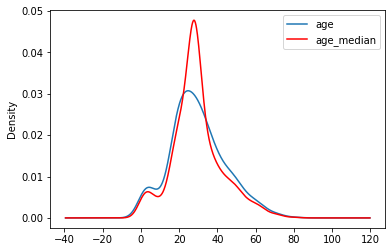

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_median.plot(kind='kde', ax=ax,color = 'red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc= "best")

### advantages and disadvantages
advantages
1. easy to implement
2. robust to outliers
3. faster way to obtain dataset

disadvantages
1. change in variance of data
2. impacts correlation

## Random Sample Imputation

Aim: similar to mean/median/mode imputation  
consist of taking random observations from dataset and we use this observation to replace nan values  

when to use?
-> assumes data is mcar(missing completely at random)  

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [4]:
df = df[['survived','age','fare']]
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [6]:
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [11]:
def impute_nan(df,var,median):
    df[var+"_median"] = df[var].fillna(median)
    df[var+"_random"] = df[var]
    random_sample = df[var].dropna().sample(df[var].isnull().sum(),random_state=0)
    random_sample.index = df[df[var].isnull()].index
    df.loc[df[var].isnull(),var+'_random']=random_sample

In [9]:
med = df['age'].median()

In [12]:
impute_nan(df,'age',med)

C:\Users\ASHWIN JAIN 10\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ASHWIN JAIN 10\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASHWIN JAIN 10\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [13]:
df.head()

,survived,age,fare,age_median,age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

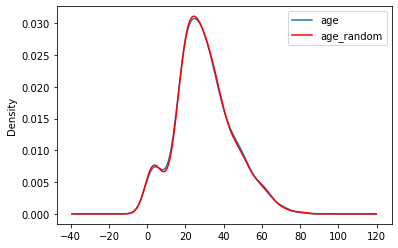

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_random.plot(kind='kde', ax=ax,color = 'red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc= "best")

### Advantages
1. easy to implement
2. no distortion in variance

### Disadvantage
1. Every situation randomness would not work

## Capturing nan values with new feature
 works well if data is not misssing completely at random

In [16]:
df = sns.load_dataset('titanic')
df = df[['survived','age','fare']]
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
import numpy as np

In [18]:
df['age_nan'] = np.where(df['age'].isnull(),1,0)

In [19]:
df.head()

,survived,age,fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


### Advantages
1. easy to implement
2. captures important missing

### Disadvantage
1. creating additional features(curse of dimensionality)

In [24]:
df['age'].fillna(df['age'].median(),inplace=True)

In [25]:
df.head()

,survived,age,fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


## End of distribution imputation

In [26]:
df = sns.load_dataset('titanic')
df = df[['survived','age','fare']]
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


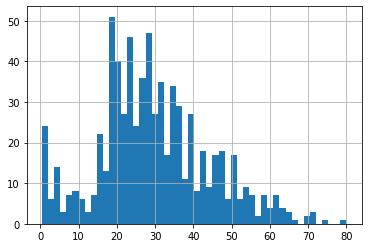

In [28]:
df.age.hist(bins=50)

In [32]:
extreme = df.age.mean()+3*df.age.std()

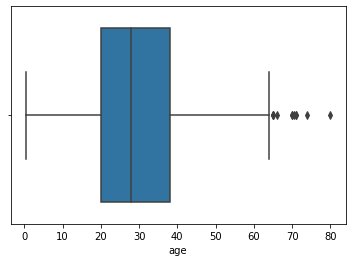

In [31]:
sns.boxplot("age",data=df)

In [34]:
def impute_nan(df,var,median,extreme):
    df[var+"_end_distribution"] = df[var].fillna(extreme)
    df[var].fillna(median,inplace=True)

In [36]:
median = df['age'].median()

In [37]:
impute_nan(df,"age",median,extreme)

In [38]:
df.head()

,survived,age,fare,age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


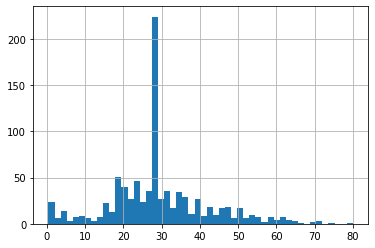

In [39]:
df['age'].hist(bins=50)

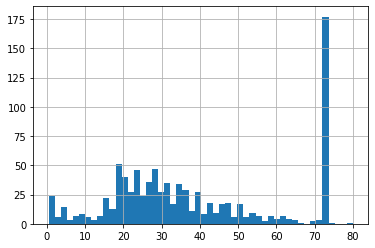

In [40]:
df['age_end_distribution'].hist(bins=50)

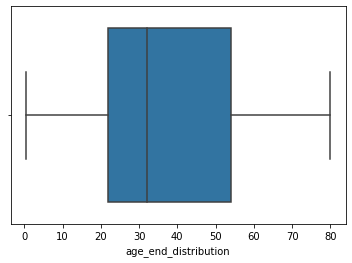

In [41]:
sns.boxplot('age_end_distribution',data=df) #outliers are gone

### advantages
1. easy to implement
2. captures the importance of missingness if there is one

### disadvantages
1. distorts the original distribution of variable
2. if missingness not important, it may mask the predictive power of original variable by distorting the distribution
3. if no. of na is big, it will mask true outliers in distribution
4. if no. of na is small, replaced na is considered as outlier

## Ordinal number encoding day 4

where catagories can be ordered on basis of rank.  
ex. grading system, experience of batsman, weekdays and weekends,

In [1]:
import datetime

In [3]:
td = datetime.datetime.today() ## current date

In [4]:
td

datetime.datetime(2020, 12, 3, 22, 39, 33, 201432)

In [5]:
td-datetime.timedelta(3) # difference of days

datetime.datetime(2020, 11, 30, 22, 39, 33, 201432)

In [7]:
## list comprehension
days = [td-datetime.timedelta(i) for i in range(0,15)]

In [8]:
import pandas as pd

In [41]:
data = pd.DataFrame(days)
data.columns=['Day']

In [42]:
data.head()

,Day
0,2020-12-03 22:39:33.201432
1,2020-12-02 22:39:33.201432
2,2020-12-01 22:39:33.201432
3,2020-11-30 22:39:33.201432
4,2020-11-29 22:39:33.201432


In [43]:
data['weekday'] = data['Day'].dt.day_name() # getting weekdays of date

In [44]:
data.head()

,Day,weekday
0,2020-12-03 22:39:33.201432,Thursday
1,2020-12-02 22:39:33.201432,Wednesday
2,2020-12-01 22:39:33.201432,Tuesday
3,2020-11-30 22:39:33.201432,Monday
4,2020-11-29 22:39:33.201432,Sunday


In [45]:
dictionary = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' :3,
    'Thursday' : 4,
    'Friday' :5,
    'Saturday' :6,
    "Sunday": 7
}

In [46]:
data["Weekday_ordinal"] = data['weekday'].map(dictionary) #mapping rank to each date
data.head()

,Day,weekday,Weekday_ordinal
0,2020-12-03 22:39:33.201432,Thursday,4
1,2020-12-02 22:39:33.201432,Wednesday,3
2,2020-12-01 22:39:33.201432,Tuesday,2
3,2020-11-30 22:39:33.201432,Monday,1
4,2020-11-29 22:39:33.201432,Sunday,7


## Count/ frequency encoding

In [64]:
train_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)

In [65]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [66]:
columns = [1,3,5,6,7,8,9,13]

In [67]:
train_set = train_set[columns]

In [68]:
train_set.columns = ['Employement','Degree','Status','Designation','family_job','Race','Sex','Country']

In [69]:
train_set.head()

,Employement,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [70]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels') #how many unique categories

Employement : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [74]:
cm = train_set['Country'].value_counts().to_dict()

In [76]:
train_set['Country'] = train_set['Country'].map(cm) #mapping with their count

In [77]:
train_set

,Employement,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,29170
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,29170
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,29170
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,29170


### Advantages

1. Easy to use.  
2. Not increasing feature space  

### Disadvantages

1. provide same weight if frequencies are same.  

## Target Guided ordinal Encoding
1. Ordering labels according to target
2. Replace labels by joint probability of being 1 or 0.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv",usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
df['Cabin'] = df['Cabin'].astype(str).str[0] #replacing all seat numbers with their compartment number like c59 with c
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [5]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [8]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [10]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)} #ranking all labels
ordinal_labels2 # higher rank means higher survival probability

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [11]:
df['Cabin_labels'] = df['Cabin'].map(ordinal_labels2)
df.head() # target = survived

,Survived,Cabin,Cabin_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


## Mean encoding
1. same as target encoding

In [13]:
mean_ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [14]:
df['Cabin_mean_label'] = df['Cabin'].map(mean_ordinal_labels)
df.head()

,Survived,Cabin,Cabin_labels,Cabin_mean_label
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


### Advantages
1. capture info within label.  
2. creates monotonic relationship between target and variable

### Disadvantages
1. prones to overfitting

## Probability Ratio Encoding
1. Label categories on the basis of p(target)/p(target') ratio(like in this case, p(survived)/p(death)

In [16]:
df = pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [17]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [18]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [19]:
df['Cabin'] = df['Cabin'].astype(str).str[0] #replacing all seat numbers with their compartment number like c59 with c
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [21]:
prob_df = df.groupby(['Cabin'])['Survived'].mean() # finding mean of all cabin

In [23]:
prob_df = pd.DataFrame(prob_df)

In [26]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [25]:
prob_df['Died'] = 1-prob_df['Survived']

In [27]:
prob_df['Probability_Ratio'] = prob_df['Survived']/prob_df['Died']

In [28]:
prob_df.head()

,Survived,Died,Probability_Ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [29]:
probability_encoded = prob_df['Probability_Ratio'].to_dict()
probability_encoded

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [30]:
df['Cabin_encoded'] = df['Cabin'].map(probability_encoded)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


# Transformation

## Why transformation of features required?
1. Eucledian distance, global minima comes out with lot of difference that affects the speed of algo

Deep Learning techniques (like ANN,CNN,RNN) also requires standardization and scaling.  

Types of Transformation
1. Normalization and Standardization
2. scaling to minimum and maximum values
3. Scaling to median and quantities
4. Gaussian transformation Logarithmic transformation, Reciprocal Transformation, square transformation, Exponential transformation, Box-cox transformation

### Standardization
1. Try to bring variables and features to a similar scale.
2. standardization means centering the variables to zero.  
3. Formula: z=(x*x_mean)/std;

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [13]:
df['Age'].fillna(df['Age'].median(),inplace=True) #filling all null values with median
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler # standardization feature

In [15]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [16]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

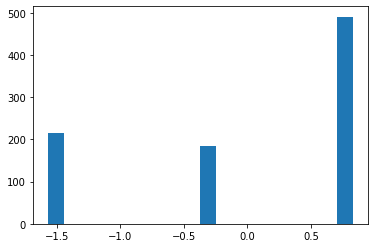

In [18]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

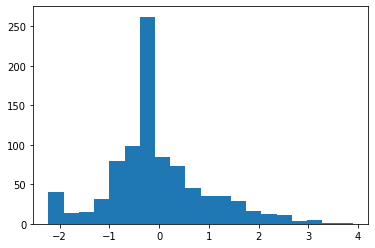

In [19]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

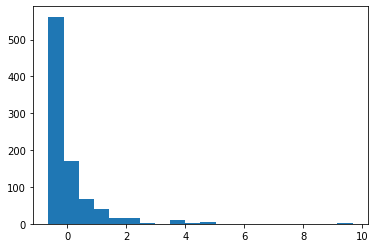

In [20]:
plt.hist(df_scaled[:,3],bins=20) #right skewed graph

### Min max scaling
Min max scaling scales values between 0 and 1.  
formula = (x-xmin)/(xmax-xmin)

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

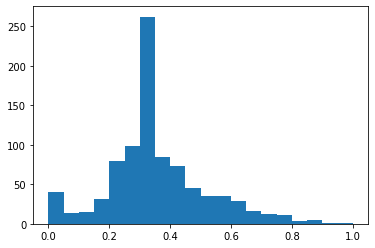

In [22]:
plt.hist(df_minmax.Age,bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

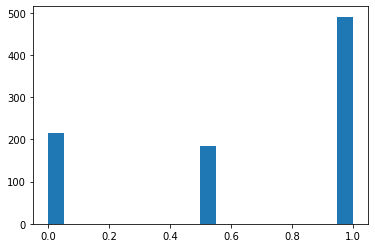

In [23]:
plt.hist(df_minmax.Pclass,bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

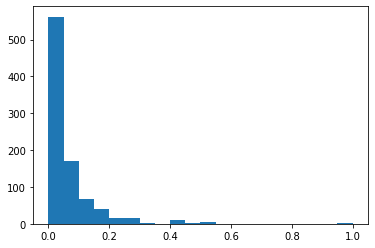

In [24]:
plt.hist(df_minmax.Fare,bins=20)

### Robust Scaler
used to scale features to median and quantiles.  
IQR = 75percentile - 25percentile  
X_scaled = (X - X_median)/IQR

In [25]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaler =  pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

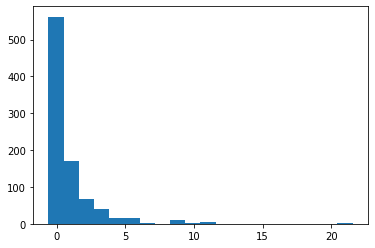

In [26]:
plt.hist(df_robust_scaler.Fare,bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

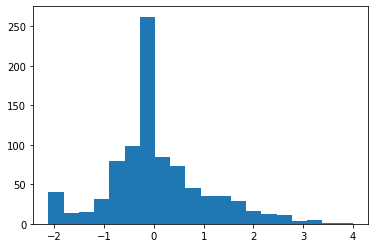

In [27]:
plt.hist(df_robust_scaler.Age,bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

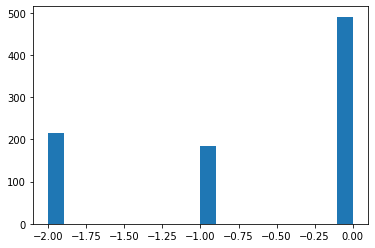

In [28]:
plt.hist(df_robust_scaler.Pclass,bins=20)

## Gaussian Transformation
Convert features that are not normally distributed into normal distributed  
gives accuracy and good performance.  
Types:  
1. Logarithmic transformation. 
2. Reciprocal Transformation
3. square transformation
4. Exponential transformation
5. Box-cox transformation


In [31]:
df = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [34]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Q-Q Plot:  
Tells us whether data is normal distributed

In [36]:
import scipy.stats as stat
import pylab

In [40]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

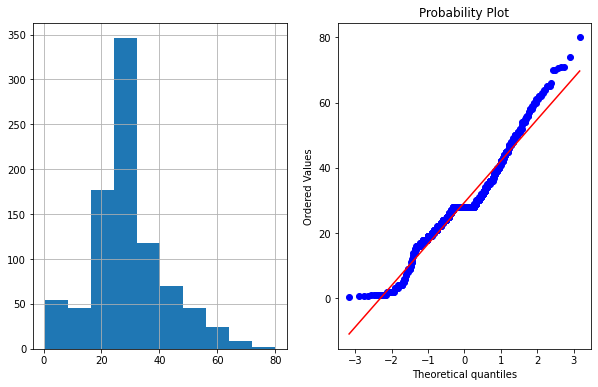

In [41]:
plot_data(df,'Age')

### logarithmic transformation

In [42]:
import numpy as np
df['Age_log'] = np.log(df['Age'])

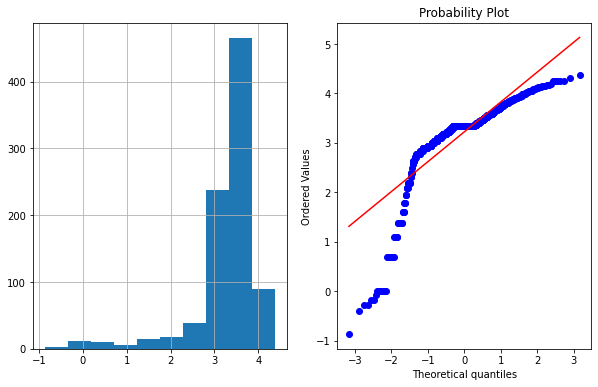

In [43]:
plot_data(df,'Age_log')

### Reciprocal Transformation

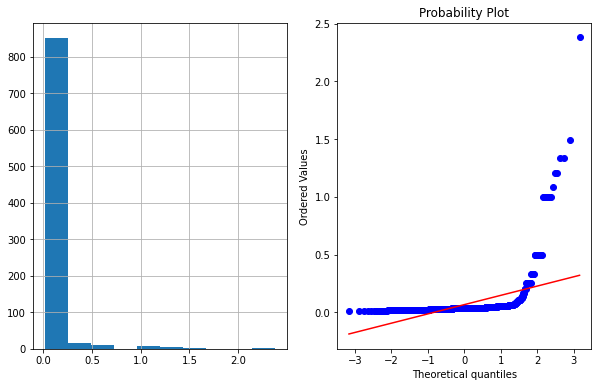

In [46]:
df['Age_reciprocal'] = 1/df['Age']
plot_data(df,'Age_reciprocal')

### Square root transformation

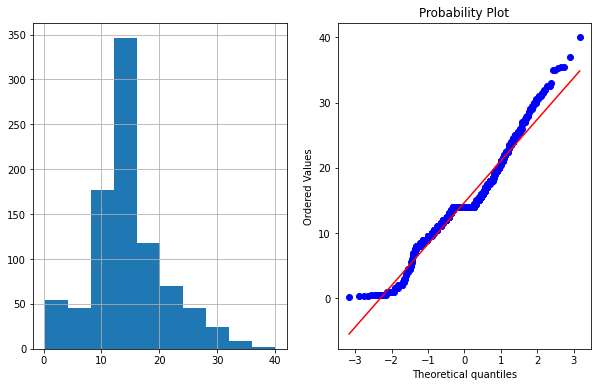

In [47]:
df['Age_sqrt'] = df['Age']**1/2
plot_data(df,'Age_sqrt')

### Exponential Transformation

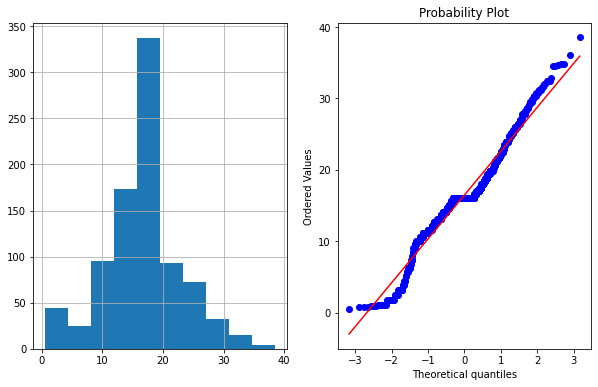

In [48]:
df['Age_exp'] = df['Age']**(1/1.2)
plot_data(df,'Age_exp')

### BoxCox transformation

T(Y) = {Y exp(lambda) - 1}/lambda

In [50]:
df['Age_boxcox'],parameters = stat.boxcox(df['Age'])

In [51]:
print(parameters)

0.7964531473656952


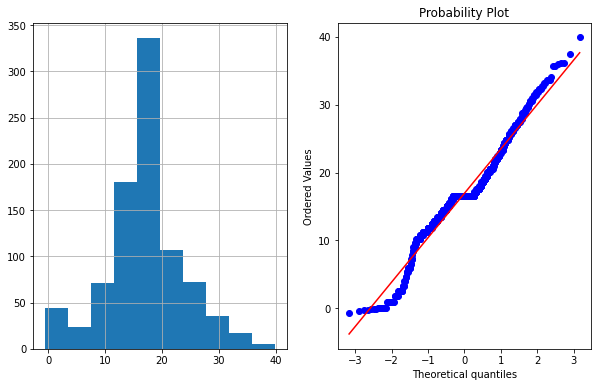

In [52]:
plot_data(df,'Age_boxcox')

# Handling imbalanced Dataset
every model with higher accuracy does not mean that our data can be used for the use of production, there might be cases when our data might give higher accuracy on test set but may suffer a very less accuracy while we feed model with new data for prediction. This happens because the cases comes out to be of those where our expected results lie under anomalies or we can say proportion of predictions that does not give expected results. suppose our accuracy is 95%, then 5% of results will be considered as noise and will be ignored. But there are higher probability that there may arise cases where our model would not give expected results as our model has ignored the case in training set as they got ignored as noise.

the unwanted results that we get from model are known as naive results. 
### Detecting naive results.
naive results can be detected with a number of tools that are discussed below:
1. Confusion Matrix
2. precision
3. recall
4. F1

### Confusion matrix
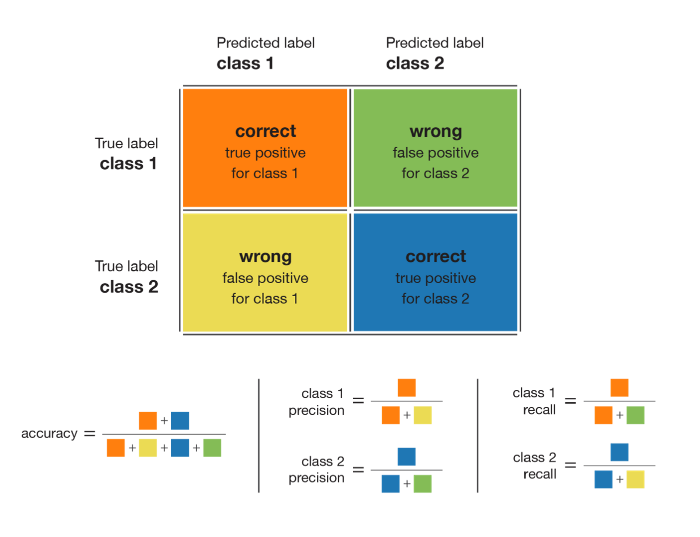

1. The ```precision``` of a class define how trustable is the result when the model answer that a point belongs to that class.
2. The ```recall``` of a class expresses how well the model is able to detect that class. 
3. The ```F1 score``` of a class is given by the harmonic mean of precision and recall  
(2×precision×recall / (precision + recall)),  
it combines precision and recall of a class in one metric.

For a given class, the different combinations of recall and precision have the following meanings :
1. high recall + high precision : the class is perfectly handled by the model
2. low recall + high precision : the model can’t detect the class well but is highly trustable when it does
3. high recall + low precision : the class is well detected but the model also include points of other classes in it
4. low recall + low precision : the class is poorly handled by the model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
#independant and dependant features
x = df.drop('Class',axis=1)
y = df.Class

### Cross validation and kfold

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [11]:
log_class = LogisticRegression()
grid = {'C':10.0**np.arange(-2,3),'penalty': ["l1",'l2']} #for hyperparameter tuning, penalty is used for tuning
cv = KFold(n_splits=5,shuffle=False,random_state=None)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [15]:
clf = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro') #cv=cross_validation
clf.fit(X_train,y_train)

C:\Users\ASHWIN JAIN 10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [17]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85244    46]
 [   39   114]]
0.9990051847430451
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.71      0.75      0.73       153

    accuracy                           1.00     85443
   macro avg       0.86      0.87      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85281     9]
 [   34   119]]
0.9994967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.93      0.78      0.85       153

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



### Under Sampling
reduce points of maximum labels  
lots of disadvantage if we use it with large dataset, thus recommended for small dataset.

In [23]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [26]:
y_train.value_counts() #many records of 0, we will reduce it by 75%

0    199025
1       339
Name: Class, dtype: int64

In [29]:
ns = NearMiss(0.8) # 80 percent of y_train_ns.count = x_train.count
X_train_ns,y_train_ns = ns.fit_sample(X_train,y_train)
print('the number of classes before fit: {}'.format(Counter(y_train)))
print('the number of classes after fit: {}'.format(Counter(y_train_ns)))

C:\Users\ASHWIN JAIN 10\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


the number of classes before fit: Counter({0: 199025, 1: 339})
the number of classes after fit: Counter({0: 423, 1: 339})


In [35]:
classifier = RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [36]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred)) #this shows that precision is bad for large data as out accuracy has decreased.

[[64145 21145]
 [    9   144]]
0.7524197418161815
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     85290
           1       0.01      0.94      0.01       153

    accuracy                           0.75     85443
   macro avg       0.50      0.85      0.44     85443
weighted avg       1.00      0.75      0.86     85443



In [37]:
### Over Sampling
from imblearn.over_sampling import RandomOverSampler

In [39]:
os = RandomOverSampler(0.5)
X_train_ns,y_train_ns = os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\ASHWIN JAIN 10\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 199025, 1: 339})
The number of classes after fit Counter({0: 199025, 1: 99512})


In [40]:
classifier = RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [41]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85284     6]
 [   31   122]]
0.9995669627705019
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.95      0.80      0.87       153

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### SMOTETomek

In [42]:
from imblearn.combine import SMOTETomek #makes use of combination of undersampler and oversampler
#create new points, and takes more time than oversampler

In [43]:
os = SMOTETomek(0.5)
X_train_ns,y_train_ns = os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\ASHWIN JAIN 10\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 199025, 1: 339})
The number of classes after fit Counter({0: 198161, 1: 98648})


In [44]:
classifier = RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [45]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85278    12]
 [   26   127]]
0.9995552590615966
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.91      0.83      0.87       153

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### Ensemble Techniques

In [46]:
from imblearn.ensemble import EasyEnsembleClassifier

In [47]:
easy = EasyEnsembleClassifier()
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [48]:
y_pred = easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[82606  2684]
 [   12   141]]
0.9684468007911707
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85290
           1       0.05      0.92      0.09       153

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



# ---------------------------------------------------------------------------------------------------------------

# Discussion on outlier and impact on machine learning
### Which machine learning models are sensitive to outliers?
1. Naive Bayes Classifier ----------------- not sensitive to outliers
2. SVM ---------------------------------------- not sensitive to outliers
3. Linear regression ---------------------- sensitive to outliers
4. Logistic regression -------------------- sensitive to outliers
5. Decision Tree regressor / classifier --- not sensitive to outliers
6. Ensemble(RF,XGboost,GB) ---------------- not sensitive to outliers
7. KNN ------------------------------------ not sensitive to outliers
8. Kmeans --------------------------------- sensitive to outliers
9. Hierarchial ---------------------------- sensitive to outliers
10. PCA ----------------------------------- sensitive to outliers
11. Neural networks ----------------------- sensitive to outliers

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

<AxesSubplot:xlabel='Age'>

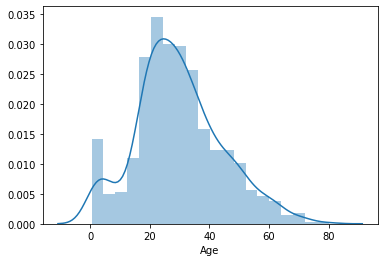

In [5]:
import seaborn as sns
sns.distplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age'>

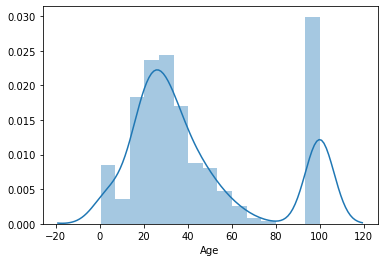

In [6]:
sns.distplot(df['Age'].fillna(100))

### Gaussian Distribution

Text(0, 0.5, 'no. of passengers')

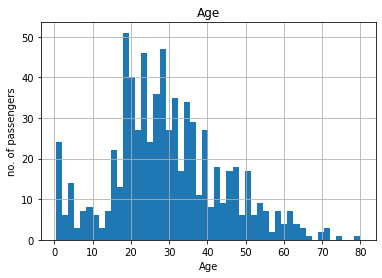

In [8]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('no. of passengers')

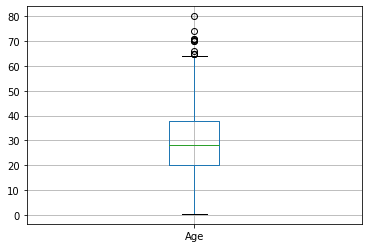

In [9]:
figure=df.boxplot(column='Age')

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
##### Assuming age follows gaussian distribution, we will calculate boundaries that differentiates outliers.
upper_boundary = df['Age'].mean()+3*df['Age'].std()
lower_boundary = df['Age'].mean()-3*df['Age'].std()
print(lower_boundary,' ',upper_boundary)
print(df['Age'].mean())

-13.88037434994331   73.27860964406095
29.69911764705882


### Feature is skewed

Text(0, 0.5, 'no. of passengers')

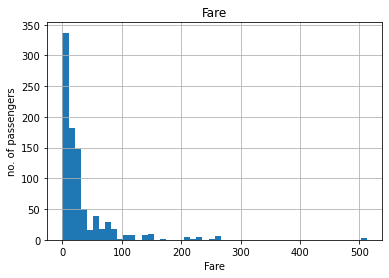

In [19]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('no. of passengers')

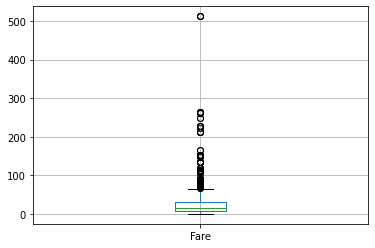

In [20]:
figure=df.boxplot(column='Fare')

In [21]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Note- IQR is only used when our data is skewed

In [23]:

IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [24]:
lower_bridge = df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge,upper_bridge)

-26.724 65.6344


In [25]:
## Can be considered just for the sake of extreme outliers
lower_bridge = df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge,upper_bridge)

-61.358399999999996 100.2688


In [26]:
data = df.copy()
data.loc[data['Age']>=73,'Age']=73

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
### All extreme outliers have been replaced by 100
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'no. of passengers')

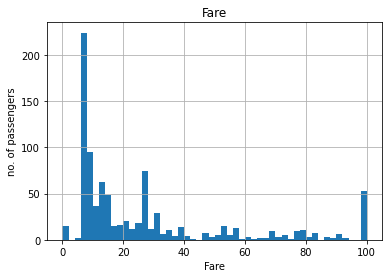

In [32]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('no. of passengers')

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [40]:
### Logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred1=classifier.predict_proba(x_test)

In [41]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6268656716417911
roc_auc_score: 0.6707139529466575
